# HW2 Coding Question

## Create model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
import math
import pandas as pd
import os

class Model(object):
    """
     Ridge Regression(Linear Least Squares Regression with Tikhonov regularization).
    """
    def __init__(self):
        """
        Constructor
        """
        self.beta = None

    def fit(self, X, y, lamda):
        """
        Fits the ridge regression model to the training data.

        Arguments
        ----------
        X: nxp matrix of n examples with p independent variables
        y: response variable vector for n examples
        alpha: regularization parameter.
        """
       	# Your code here
        # calculate w
        I = np.eye(X.shape[1])
        self.beta = np.linalg.inv((X.T).dot(X)+lamda*I).dot(X.T).dot(y)
        return self.beta

    def predict(self, X):
        """
        Predicts the dependent variable of new data using the model.

        Arguments
        ----------
        X: nxp matrix of n examples with p covariates

        Returns
        ----------
        response variable vector for n examples
        """
       	# Your code here
        return X.dot(self.beta)

    def validate(self, X, y):
        """
        Returns the RMSE(Root Mean Squared Error) when the model is validated.

        Arguments
        ----------
        X: nxp matrix of n examples with p covariates
        y: response variable vector for n examples

        Returns
        ----------
        RMSE when model is used to predict y
        """
       	# Your code here
        s = ((self.beta.T).dot(X.T).dot(X).dot(self.beta))-2*(((X.T).dot(y)).T).dot(self.beta)
        return s

## Fit the model with data

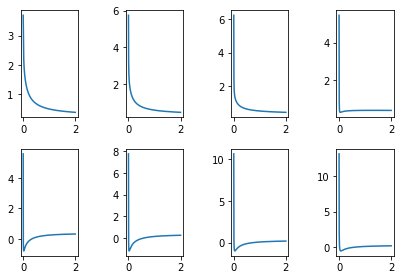

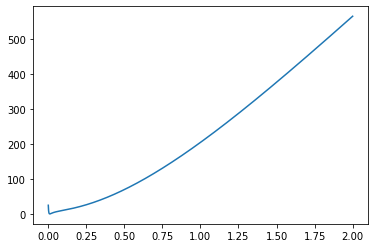

In [5]:
#Read command line arguments

# TODO: Modify the path to read your dataset

X_train_path = "/Users/muzo01/Cpp_projects/Xtraining.csv"
y_train_path = "/Users/muzo01/Cpp_projects/Ytraining.csv"
X_val_path = "/Users/muzo01/Cpp_projects/Xvalidation.csv"
y_val_path = "/Users/muzo01/Cpp_projects/Yvalidation.csv"
X_test_path = "/Users/muzo01/Cpp_projects/Xtesting.csv"
y_test_path = "/Users/muzo01/Cpp_projects/Ytesting.csv"

#Parse training dataset
X_train = np.genfromtxt(X_train_path, delimiter=',')
y_train = np.genfromtxt(y_train_path, delimiter=',')

#Parse validation set
X_val = np.genfromtxt(X_val_path, delimiter=',')
y_val = np.genfromtxt(y_val_path, delimiter=',')

#Parse testing set
X_test = np.genfromtxt(X_test_path, delimiter=',')
y_test = np.genfromtxt(y_test_path, delimiter=',')

#find the best regularization parameter
# Your code here
reg = Model()

beta = np.zeros((X_train.shape[1],1000))
j = 0
for lamda in np.linspace(0.001, 2, num = 1000):
    beta[:, j] = reg.fit(X_train, y_train, lamda)
    j = j + 1

fig, axs = plt.subplots(2, 4)
fig.tight_layout()

axs[0,0].plot(np.linspace(0.001, 2, num = 1000), beta[0, :])
axs[0,1].plot(np.linspace(0.001, 2, num = 1000), beta[1, :])
axs[0,2].plot(np.linspace(0.001, 2, num = 1000), beta[2, :])
axs[0,3].plot(np.linspace(0.001, 2, num = 1000), beta[3, :])
axs[1,0].plot(np.linspace(0.001, 2, num = 1000), beta[4, :])
axs[1,1].plot(np.linspace(0.001, 2, num = 1000), beta[5, :])
axs[1,2].plot(np.linspace(0.001, 2, num = 1000), beta[6, :])
axs[1,3].plot(np.linspace(0.001, 2, num = 1000), beta[7, :])


#plot rmse versus lambda
# Your code here
rmse = np.zeros(1000)
j = 0
for lamda in np.linspace(0.001, 2, num = 1000):
    w = reg.fit(X_val, y_val, lamda)
    su = 0
    rss = reg.validate(X_val, y_val)
    r = 0
    for i in range(w.shape[0]):
        su = su + lamda**2 * w[i]**2
    for i in range(X_val.shape[0]):
        r = (y_val[i] - (X_val[i,:]).dot(w))**2
    
    rmse[j] = r + su
    j = j + 1

plt.figure(2)
plt.plot(np.linspace(0.001, 2, num = 1000), rmse)

#plot predicted versus real value
# Your code here

#plot regression coefficients
# Your code here

In the coefficient figure, we noticed that as λ increase, each coefficient of the vector β decreased toward 0.
In the RMSE plot, we could find the λ* = 0.011 would achive the minimum RMSE

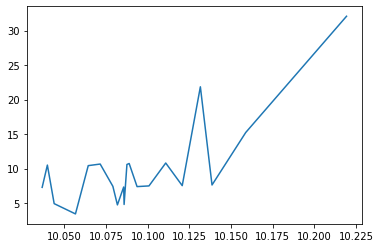

In [6]:
lamda = 0.011
reg.fit(X_test, y_test, lamda)
Xt = reg.predict(X_test)
xs, ys = zip(*sorted(zip(Xt, y_test)))
plt.plot(xs, ys)